# Upper Confidence Bound

### Intuition

We take the expected value for each distribution and find the highest expected value

The algorithm plots an empirical line that is the same for all distributions at the start. It then creates confidence bounds for each distribution using these empirical lines. The algorithm begins to test each distribution in order to form actual confidence bounds

The empiricial lines become the average expected return as the number of tests are run, and over time the law of large numbers tell us that after a number of tests then the empirical lines. The empirical lines begin to converge to the true expected return. We then adjust our confidence bounds after the adjustment of the empirical lines. We feel more confident in our confidence bounds so the bounds shrink and confidence grows

The algorithm now has confidence in about the expected return for all distributions including one with the highest return. Once we find the distribution with the highest return, the algorithm will begin to run more and more tests on that solution and our confidence increases so the bounds decrease further. After some time, the algorithm will test the sub-optimal distribution to ensure that the algorithm is using the optimal solution, and will determine that this not the optimal solution. From here, the algorithm will begin to exploit the optimial solution to the fullest

## Importing the libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset

In [2]:
# Importing the dataset
# In another example, we will implement the ads and record the data in real time. We will use that data to train our model
# so that we can find the optimal solution qucikly
# This data is the final, true value that we do not have in the real world but this is a good start for intutive example
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing the Upper Confidence Bound

In [3]:
# Implementing UCB
import math
# Enter the number of rounds we are using
N = 10000
# Enter the number of versions of the ad we are showing
d = 10
# Initialize as an empty list
ads_selected = []
# This shows the number of times each ad was shown; creates a vector of size d
# Initialize the values to 0
numbers_of_selections = [0] * d
# Shows the sum of the reward for each ad up to round N (number of people shown)
sums_of_rewards = [0] * d
# Initialize total reward to 0 so we can increment it after each round
total_reward = 0
# For each round (n) in range in lower bound (0) and upper bound (N)
for n in range(0, N):
    # Initialize the index for the ad with the maximum upper bound to 0 since indexing starts at 0
    ad = 0
    # Initialize the max upper bound to 0 to start
    max_upper_bound = 0
    # Need to loop through all versions of the ad (d)
    for i in range(0, d):
        # If the ad was selected at least once; after first 10 rounds then this code allows us to choose the optimal ad
        if (numbers_of_selections[i] > 0):
            # Get the average reward, get the sum of the rewards for that ad divided by the number of times that ad was shown
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            # Calculate confidence interval at round n
            # Use n+1 since the first value in log is 1 and not 0 since python indexing starts at 0 but log(0) does not exist
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            # Get the upper bound by adding the delta to the average reward
            upper_bound = average_reward + delta_i
        # Otherwise if the ad has not been selected at least once
        else:
            # Set the upper bound to a very high number, so that we get a big upper_bound number that is larger than the 
            # upper bound generated from average_reward + delta_i
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            # Create a variable to store the maximum upper bound for each round. We will compare the upper bound for each ad
            # to the maximum upper bound. If the current upper bound > max then that upper bound becomes the new 
            # maximum upper bound
            max_upper_bound = upper_bound
            # Keep track of the index of the ad with the maximum upper bound
            ad = i
    # This vector will give us a list of all the ads that were selected after each round
    ads_selected.append(ad)
    # We need to update the number of times this ad was used by adding 1 to the value at that ad index
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    # We need to get the reward for the ad; in real life, we need to see if the user clicked on the advertisement,
    # if yes reward is 1, 0 otherwise
    # For this example, we get the value for the round we are on and the reward for the ad that was selected
    reward = dataset.values[n, ad]
    # We need to update the sum of rewards vector to add the reward for the ad that was selected to the total sum of rewards
    # for that ad
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    # We need the total_reward for all the ads after all the rounds have been run
    total_reward = total_reward + reward
# This total reward is almost double the random selected total_reward of 1287
print(total_reward)
print(ads_selected)

2178
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 6, 6, 7, 7, 7, 0, 6, 7, 4, 1, 1, 1, 2, 2, 2, 3, 5, 9, 2, 8, 7, 0, 1, 6, 4, 7, 2, 8, 3, 5, 9, 9, 9, 9, 4, 0

## Visualizing the Results

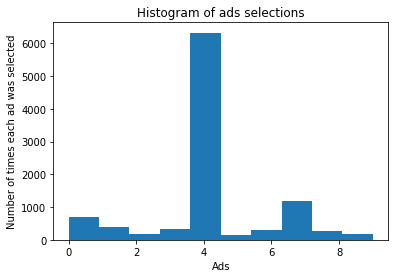

In [4]:
# Visualizing the results
# Create a histogram to show the number of times each add was selected
plt.hist(ads_selected)
# Create a title
plt.title('Histogram of ads selections')
# Label my x-axis
plt.xlabel('Ads')
# Label my y-axis
plt.ylabel('Number of times each ad was selected')
plt.show()